# Importando Blibiotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from neuralprophet import NeuralProphet
import seaborn as sns
import statsmodels.api as sm

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# Importando os dados

In [2]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
df_demandas.columns = ['ds','y']

# Fase de Testes

In [4]:
qtd_previsoes = 1
n_lags = 52
'''
indices_mudanca = [0,46,83,len(df_demandas)-1]
pontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'''

'\nindices_mudanca = [0,46,83,len(df_demandas)-1]\npontos_mudanca = [df_demandas.ds[i] for i in indices_mudanca]'

In [5]:
params = { "growth": "off",
           #"trend_reg": 0.01,
           #"changepoints_range":0.3,
           "n_forecasts":qtd_previsoes,
           "n_changepoints": 0,
           "batch_size": 50,
           "n_lags": n_lags,
           "learning_rate": 0.1,
           "epochs": 100,
           #"changepoints": pontos_mudanca,
           "yearly_seasonality":3, #ao se colocar um numero, ele defini o grau da serie de fourier, por padrao e 6
           "weekly_seasonality":False,
           "daily_seasonality":False,
           "num_hidden_layers":1,
           #"d_hidden":2
        }

In [6]:
model = NeuralProphet(**params)

In [7]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

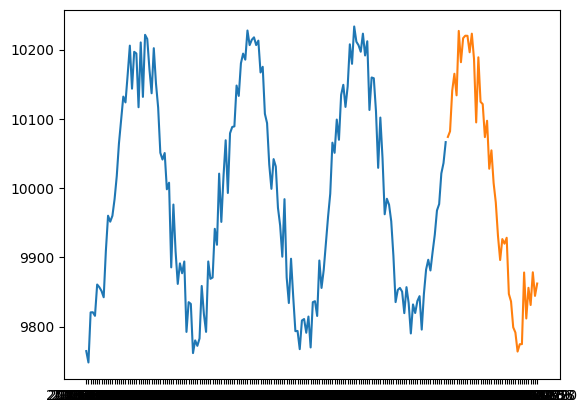

In [8]:
plt.plot(df_train.ds,df_train.y)
plt.plot(df_test.ds,df_test.y)

In [9]:
metrics = model.fit(df_train,freq='7d')
previsoes = model.predict(df_demandas)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 7d
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


Training: 0it [00:00, ?it/s]

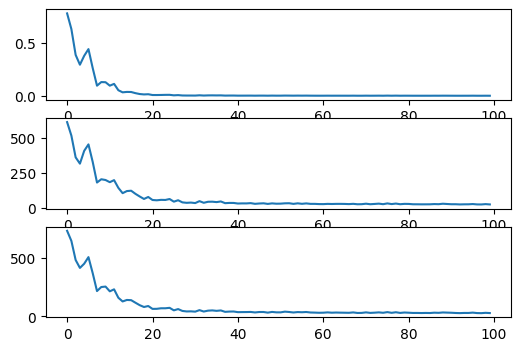

In [11]:
fig=plt.figure(figsize=(6,4))

ax=fig.add_subplot(3,1,1)
plt.plot(metrics.Loss)
ax=fig.add_subplot(3,1,2)
plt.plot(metrics.MAE)
ax=fig.add_subplot(3,1,3)
plt.plot(metrics.RMSE)

In [12]:
model.plot_parameters(components=['Trend','Seasonality'])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'e3ce3f12-fcfc-4314-9cef-56d2df17825b',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2018, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9120.93, 9120.93], dtype=float32),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'uid': '6a76f1ef-145e-42b9-9f99-d701bb758f64',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0), ...,
                          datetime.da

In [13]:
previsoes_test = previsoes['yhat1'].iloc[166:].values


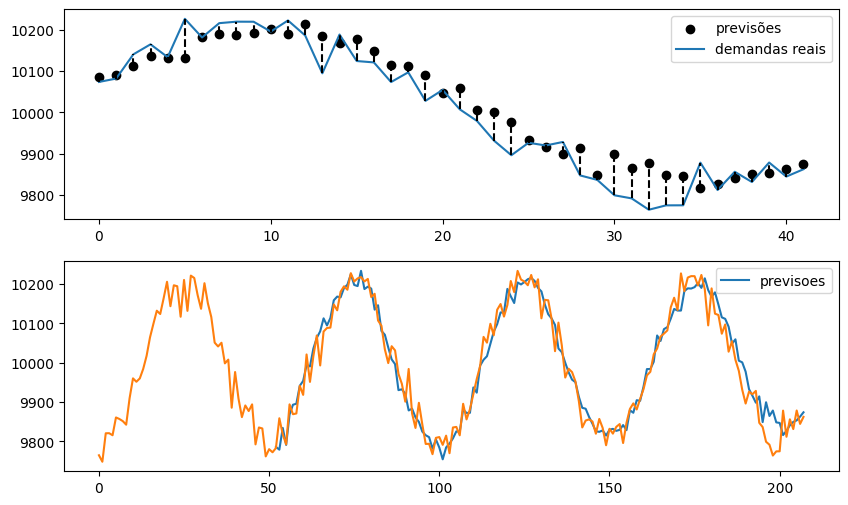

In [14]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)


plt.scatter(range(len(df_test)),previsoes_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test.y,label='demandas reais')
plt.legend()
indice = 0 
for i in range(len(previsoes_test)):
    if previsoes_test[i] > df_test.y.iloc[i]:
        plt.vlines(x=i, ymin=df_test.y.iloc[i], ymax=previsoes_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsoes_test[i], ymax=df_test.y.iloc[i],linestyle='--',color='black')
    indice+=1



ax=fig.add_subplot(2,1,2)
plt.plot(previsoes['yhat1'],label='previsoes')
plt.plot(df_demandas.y)
plt.legend()

In [15]:
residuos = np.array(df_test.y)-previsoes_test

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

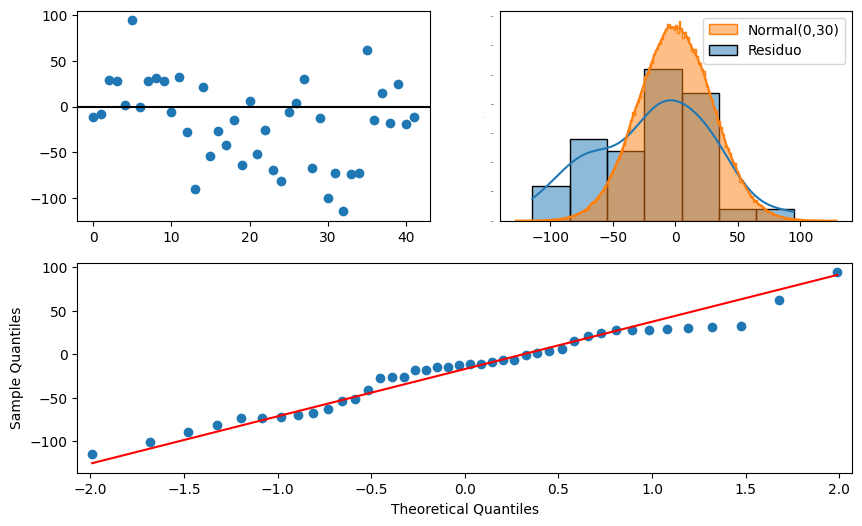

In [16]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,2,1)

plt. axhline(y=0,xmin=0,xmax=len(df_test.y),color='black')
plt.scatter(range(len(residuos)),residuos)

ax=fig.add_subplot(2,2,2)
sns.histplot(residuos,kde=True,stat='density',label="Residuo")
sns.histplot(np.random.normal(0, 30,200000),kde=True,stat='density',element='step',label='Normal(0,30)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(2,1,2)
sm.qqplot(residuos,line='q',ax=ax)
plt.show()

In [17]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsoes_test, df_test.y, axis=0))

print('MAE_Teste =',sm.tools.eval_measures.meanabs(previsoes_test, df_test.y, axis=0))

print(metrics.tail(1))

RMSE_Teste = 48.44889434686744
MAE_Teste = 37.89869807292737
          MAE       RMSE      Loss  RegLoss  epoch
99  21.974482  28.309134  0.001552      0.0     99


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$


# Fase de previsao

A própria da documentação, avisa de antes de fazer qualquer previsão real, reajuste o modelo para receber todos os dados

In [ ]:
for i in range(3):#prevendo i-esimo conjunto de demandas

    model = NeuralProphet(**params)
    metrics = model.fit(df_demandas,freq='7d')

    previsao = df_demandas.copy()
    for idx in range(52):#prevendo o conjunto de 52 demandas
        future = model.make_future_dataframe(df=previsao)
        temp = model.predict(future)
        temp['y'] = temp[['y','yhat1']].fillna(0).sum(axis=1)
        temp = temp[['ds','y']]
        previsao = previsao.append(temp.iloc[-1])
    previsao = previsao.iloc[-52:].reset_index(drop=True).y

    #salvando as previsao
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_pro/Previsao_pro{i}.txt", "w") as arquivo:

        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')
print(len(previsao))